# Welcome

IMPORTS

In [9]:
import os
from collections import deque
from datetime import datetime

import cv2
import numpy as np
import tensorflow as tf
from IPython.core.display import display, Image

import experiment_runner.preprocess_data as preprocessor
import experiment_runner.models_config as models
import experiment_runner.datasets_config as datasets
import experiment_runner.feature_extractors_config as feature_extractors

In [27]:
from absl import logging
logging.set_verbosity(logging.ERROR)

Setup constants

In [31]:
FEATURE_EXTRACTOR = feature_extractors.MobileNetV2Extractor()
EXPERIMENT_NAME = 'example_NTU-3'

# Preprocess dataset

Set Hyperparameters

In [12]:
dataset_path = '../datasets/NTU-3'
extractor = FEATURE_EXTRACTOR

Preprocess features

In [14]:
preprocessor.prepare_all_videos(dataset_path, extractor)

Extracted features from video 0
Saved to  D:\Users\quinj\Documents\School\Winter 2022\Capstone COMP 4910\BehaviouralMLProject\features\UCF-3\MobileNetV2Extractor\BodyWeightSquats\v_BodyWeightSquats_g01_c01.csv
Extracted features from video 1
Saved to  D:\Users\quinj\Documents\School\Winter 2022\Capstone COMP 4910\BehaviouralMLProject\features\UCF-3\MobileNetV2Extractor\JumpingJack\v_JumpingJack_g01_c01.csv
Extracted features from video 2
Saved to  D:\Users\quinj\Documents\School\Winter 2022\Capstone COMP 4910\BehaviouralMLProject\features\UCF-3\MobileNetV2Extractor\PushUps\v_PushUps_g01_c01.csv


# Train Models

## Set Model Hyper Parameters

EXPERIMENT PARAMETERS

In [15]:
EXPERIMENT_PARAMS = [
    {'name': 'gru',
     'batch_size': 64,
     'epochs': 10,
     },
    {'name': 'lstm',
     'batch_size': 64,
     'epochs': 10,
     },
]

DATA PARAMETERS

In [16]:
DATASETS_PARAMS = [
    {'dataset_path': './datasets/NTU-3',
     'seq_len': 50,
     'train_test_split': .8
     },
    {'dataset_path': './datasets/NTU-3',
     'seq_len': 50,
     'train_test_split': .8
     },
]

EXTRACTOR PARAMETERS

In [17]:
EXTRACTOR_PARAMS = [
    (feature_extractors.MobileNetV2Extractor, {}),
    (feature_extractors.MobileNetV2Extractor, {}),
]

MODEL PARAMETERS

In [23]:
MODEL_PARAMS = [
    (models.GRU.gru2, {'activation_function': 'relu',
                       'loss_function': 'sparse_categorical_crossentropy',
                       'optimizer': 'adam',
                       }),
    (models.LSTM.lstm2, {'activation_function': 'relu',
                       'loss_function': 'sparse_categorical_crossentropy',
                       'optimizer': 'adam',
                       }),
]

 ## Create train function

In [24]:
# TRAIN MODEL AND SAVE TO saved_experiments DIRECTORY
def train_model(model, dataset, experiment_params):
    experiment_dir = os.path.join(f'../saved_experiments/{EXPERIMENT_NAME}')

    log_dir = os.path.join(experiment_dir, 'logs/fit/',
                           experiment_params['name'] + '_' + datetime.now().strftime("%Y%m%d-%H%M%S"))

    save_model_callback = tf.keras.callbacks.ModelCheckpoint(os.path.join(experiment_dir, experiment_params['name']),
                                                             monitor='val_loss',
                                                             verbose=1,
                                                             save_best_only=True,
                                                             options=None,)

    tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir,
                                                          histogram_freq=1,
                                                          update_freq='epoch',)

    out = model.fit(
        dataset.train_dataset,
        validation_data=dataset.validation_dataset,
        epochs=experiment_params['epochs'],
        batch_size=experiment_params['batch_size'],
        callbacks=[tensorboard_callback, save_model_callback],
    )
    return out

## Train Models

Launch tensorboard

In [25]:
from tensorboard import notebook
log_dir = os.path.join(f'../saved_experiments/{EXPERIMENT_NAME}/logs')
%load_ext tensorboard
%tensorboard --logdir {log_dir}

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


Reusing TensorBoard on port 6006 (pid 4292), started 0:00:32 ago. (Use '!kill 4292' to kill it.)

Train loop

In [26]:
# train test loop
for idx, (experiment_params, data_params, extractor_params, model_params) in \
        enumerate(zip(EXPERIMENT_PARAMS, DATASETS_PARAMS, EXTRACTOR_PARAMS, MODEL_PARAMS)):

    print(f'=== Training Model {data_params["name"]} ===')
    
    # init based on hyper parameters
    extractor = extractor_params[0](**extractor_params[1])  # get extractor
    dataset = datasets.Dataset.Training(**data_params, extractor=extractor)  # get data
    model = model_params[0](output_size=len(dataset.labels), **model_params[1])  # get model

    # train and save model
    train_model(model, dataset, experiment_params)  # train model
    
print('=== Training Done ===')

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: module 'gast' has no attribute 'Constant'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: module 'gast' has no attribute 'Constant'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity t

INFO:tensorflow:Assets written to: ../saved_experiments/example_NTU-3\gru\assets


2/2 [==============================] - 30s 10s/step - loss: 1.2150 - sparse_categorical_accuracy: 0.4500 - val_loss: 1.0887 - val_sparse_categorical_accuracy: 0.4000
Epoch 2/10
1/2 [==============>...............] - ETA: 0s - loss: 1.0579 - sparse_categorical_accuracy: 0.4844
Epoch 2: val_loss improved from 1.08868 to 1.05114, saving model to ../saved_experiments/example_NTU-3\gru
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: module 'gast' has no attribute 'Constant'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: module 'gast' has no attribute 'Constant'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: module 'gast' has no attribute 'Constant'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
INFO:tensorflow:Assets written to: ../saved_experiments/example_NTU-3\gru\assets


INFO:tensorflow:Assets written to: ../saved_experiments/example_NTU-3\gru\assets


2/2 [==============================] - 9s 8s/step - loss: 1.0650 - sparse_categorical_accuracy: 0.4750 - val_loss: 1.0511 - val_sparse_categorical_accuracy: 0.4667
Epoch 3/10
1/2 [==============>...............] - ETA: 0s - loss: 1.0665 - sparse_categorical_accuracy: 0.5000
Epoch 3: val_loss improved from 1.05114 to 1.02019, saving model to ../saved_experiments/example_NTU-3\gru
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: module 'gast' has no attribute 'Constant'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: module 'gast' has no attribute 'Constant'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: module 'gast' has no attribute 'Constant'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
INFO:tensorflow:Assets written to: ../saved_experiments/example_NTU-3\gru\assets


INFO:tensorflow:Assets written to: ../saved_experiments/example_NTU-3\gru\assets


2/2 [==============================] - 9s 8s/step - loss: 1.0892 - sparse_categorical_accuracy: 0.4750 - val_loss: 1.0202 - val_sparse_categorical_accuracy: 0.5333
Epoch 4/10
1/2 [==============>...............] - ETA: 0s - loss: 1.0844 - sparse_categorical_accuracy: 0.4375
Epoch 4: val_loss did not improve from 1.02019
2/2 [==============================] - 2s 848ms/step - loss: 1.0718 - sparse_categorical_accuracy: 0.4625 - val_loss: 1.0745 - val_sparse_categorical_accuracy: 0.5333
Epoch 5/10
1/2 [==============>...............] - ETA: 0s - loss: 1.0589 - sparse_categorical_accuracy: 0.5156
Epoch 5: val_loss did not improve from 1.02019
2/2 [==============================] - 1s 845ms/step - loss: 1.0693 - sparse_categorical_accuracy: 0.5000 - val_loss: 1.2513 - val_sparse_categorical_accuracy: 0.2000
Epoch 6/10
1/2 [==============>...............] - ETA: 0s - loss: 1.0437 - sparse_categorical_accuracy: 0.4375
Epoch 6: val_loss did not improve from 1.02019
2/2 [=======================

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: module 'gast' has no attribute 'Constant'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: module 'gast' has no attribute 'Constant'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
INFO:tensorflow:Assets written to: ../saved_experiments/example_NTU-3\gru\assets


INFO:tensorflow:Assets written to: ../saved_experiments/example_NTU-3\gru\assets


2/2 [==============================] - 9s 9s/step - loss: 1.0906 - sparse_categorical_accuracy: 0.4375 - val_loss: 0.9803 - val_sparse_categorical_accuracy: 0.6000
Epoch 8/10
1/2 [==============>...............] - ETA: 0s - loss: 1.0458 - sparse_categorical_accuracy: 0.4531
Epoch 8: val_loss did not improve from 0.98026
2/2 [==============================] - 1s 806ms/step - loss: 1.0653 - sparse_categorical_accuracy: 0.4125 - val_loss: 1.0426 - val_sparse_categorical_accuracy: 0.4667
Epoch 9/10
1/2 [==============>...............] - ETA: 0s - loss: 1.0470 - sparse_categorical_accuracy: 0.4375
Epoch 9: val_loss did not improve from 0.98026
2/2 [==============================] - 2s 840ms/step - loss: 1.0912 - sparse_categorical_accuracy: 0.3750 - val_loss: 1.1671 - val_sparse_categorical_accuracy: 0.0667
Epoch 10/10
1/2 [==============>...............] - ETA: 0s - loss: 1.1427 - sparse_categorical_accuracy: 0.2656
Epoch 10: val_loss did not improve from 0.98026
2/2 [=====================

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: module 'gast' has no attribute 'Constant'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: module 'gast' has no attribute 'Constant'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: module 'gast' has no attribute 'Constant'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Epoch 1/10
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
      2/Unknown - 5s 127ms/step - loss: 1.1289 - sparse_categorical_accuracy: 0.4750WARNING:tensorflow:AutoGraph could not transform <function Model.make_test_function.<locals>.test_function at 0x000001AC270ECA68> and will run it as-is.
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert

Epoch 1: val_loss improved from inf to 1.08324, saving model to ../saved_experiments/example_NTU-3\lstm
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: module 'gast' has no attribute 'Constant'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: module 'gast' has no attribute 'Constant'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: module 'gast' has no attribute 'Constant'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
INFO:tensorflow:Assets written to: ../saved_experiments/example_NTU-3\lstm\assets


INFO:tensorflow:Assets written to: ../saved_experiments/example_NTU-3\lstm\assets


2/2 [==============================] - 15s 10s/step - loss: 1.1289 - sparse_categorical_accuracy: 0.4750 - val_loss: 1.0832 - val_sparse_categorical_accuracy: 0.4667
Epoch 2/10
1/2 [==============>...............] - ETA: 0s - loss: 1.0660 - sparse_categorical_accuracy: 0.4375
Epoch 2: val_loss improved from 1.08324 to 1.06623, saving model to ../saved_experiments/example_NTU-3\lstm
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: module 'gast' has no attribute 'Constant'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: module 'gast' has no attribute 'Constant'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: module 'gast' has no attribute 'Constant'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
INFO:tensorflow:Assets written to: ../saved_experiments/example_NTU-3\lstm\assets


INFO:tensorflow:Assets written to: ../saved_experiments/example_NTU-3\lstm\assets


2/2 [==============================] - 10s 9s/step - loss: 1.0675 - sparse_categorical_accuracy: 0.4500 - val_loss: 1.0662 - val_sparse_categorical_accuracy: 0.4667
Epoch 3/10
1/2 [==============>...............] - ETA: 0s - loss: 1.0329 - sparse_categorical_accuracy: 0.5469
Epoch 3: val_loss improved from 1.06623 to 1.02358, saving model to ../saved_experiments/example_NTU-3\lstm
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: module 'gast' has no attribute 'Constant'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: module 'gast' has no attribute 'Constant'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: module 'gast' has no attribute 'Constant'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
INFO:tensorflow:Assets written to: ../saved_experiments/example_NTU-3\lstm\assets


INFO:tensorflow:Assets written to: ../saved_experiments/example_NTU-3\lstm\assets


2/2 [==============================] - 9s 9s/step - loss: 1.0598 - sparse_categorical_accuracy: 0.5000 - val_loss: 1.0236 - val_sparse_categorical_accuracy: 0.5333
Epoch 4/10
1/2 [==============>...............] - ETA: 0s - loss: 1.0556 - sparse_categorical_accuracy: 0.4844
Epoch 4: val_loss did not improve from 1.02358
2/2 [==============================] - 1s 873ms/step - loss: 1.0679 - sparse_categorical_accuracy: 0.4625 - val_loss: 1.0506 - val_sparse_categorical_accuracy: 0.5333
Epoch 5/10
1/2 [==============>...............] - ETA: 0s - loss: 1.0472 - sparse_categorical_accuracy: 0.5000
Epoch 5: val_loss did not improve from 1.02358
2/2 [==============================] - 1s 866ms/step - loss: 1.0493 - sparse_categorical_accuracy: 0.4875 - val_loss: 1.1483 - val_sparse_categorical_accuracy: 0.4000
Epoch 6/10
1/2 [==============>...............] - ETA: 0s - loss: 1.0843 - sparse_categorical_accuracy: 0.4375
Epoch 6: val_loss did not improve from 1.02358
2/2 [=======================

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: module 'gast' has no attribute 'Constant'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: module 'gast' has no attribute 'Constant'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
INFO:tensorflow:Assets written to: ../saved_experiments/example_NTU-3\lstm\assets


INFO:tensorflow:Assets written to: ../saved_experiments/example_NTU-3\lstm\assets


2/2 [==============================] - 10s 9s/step - loss: 1.0357 - sparse_categorical_accuracy: 0.4625 - val_loss: 0.9930 - val_sparse_categorical_accuracy: 0.6000
Epoch 9/10
1/2 [==============>...............] - ETA: 0s - loss: 1.0906 - sparse_categorical_accuracy: 0.3594
Epoch 9: val_loss did not improve from 0.99301
2/2 [==============================] - 2s 894ms/step - loss: 1.0655 - sparse_categorical_accuracy: 0.4250 - val_loss: 1.2024 - val_sparse_categorical_accuracy: 0.2667
Epoch 10/10
1/2 [==============>...............] - ETA: 0s - loss: 1.0631 - sparse_categorical_accuracy: 0.4688
Epoch 10: val_loss improved from 0.99301 to 0.79468, saving model to ../saved_experiments/example_NTU-3\lstm
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: module 'gast' has no attribute 'Constant'
To silence this warning, decorate the function with @tf.autograph.experimental.d

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: module 'gast' has no attribute 'Constant'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: module 'gast' has no attribute 'Constant'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
INFO:tensorflow:Assets written to: ../saved_experiments/example_NTU-3\lstm\assets


INFO:tensorflow:Assets written to: ../saved_experiments/example_NTU-3\lstm\assets


2/2 [==============================] - 10s 9s/step - loss: 1.0565 - sparse_categorical_accuracy: 0.4625 - val_loss: 0.7947 - val_sparse_categorical_accuracy: 0.6667


# Run Models


Set Hyperparameters

In [28]:
SEQ_LEN = 50
MODEL_NAME = 'lstm'

Load Model

In [29]:
model_path = os.path.join('../saved_experiments', EXPERIMENT_NAME, MODEL_NAME)
model = tf.saved_model.load(model_path)

Run Model

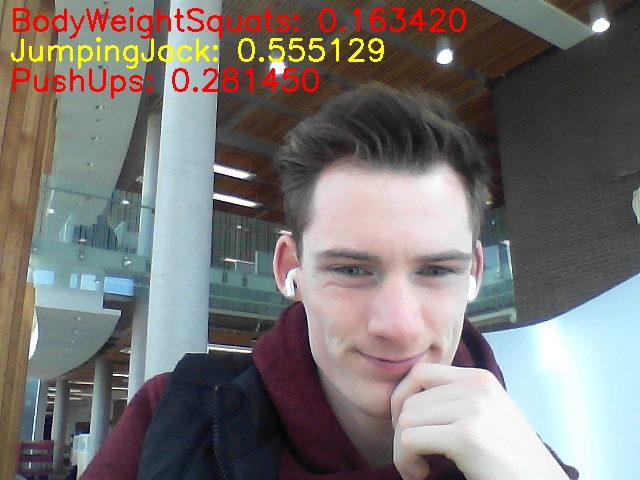

KeyboardInterrupt: 

In [32]:
frame_queue = deque(maxlen=SEQ_LEN)
cap = cv2.VideoCapture(0)
display_handle = display(None, display_id=True)
CLASS_LIST = list(os.walk(dataset_path))[0][1]

# video loop
while cap.isOpened():
    ret, frame = cap.read()
    if not ret:
        break
    height, width, channels = frame.shape

    # extract features and add to frame queue
    frame_features = FEATURE_EXTRACTOR.live_extract(frame)
    frame_queue.append(tf.keras.layers.Flatten()(frame_features))
    # load up frame queue
    if len(frame_queue)<SEQ_LEN:
        print('Queueing frame:', len(frame_queue), end='\r')
        continue
    x = tf.convert_to_tensor(list(frame_queue))
    x = tf.transpose(x, perm=[1, 0, 2])

    # make prediction
    if len(frame_queue) == SEQ_LEN:
        predicted_label_probabilities = model(x)[0]
        predicted_label = np.argmax(predicted_label_probabilities)
        predicted_class = CLASS_LIST[predicted_label]

    # write prediction to screen
    for idx, (pred, label) in enumerate(zip(predicted_label_probabilities.numpy(), CLASS_LIST)):
        cv2.putText(frame, label+': '+'{:f}'.format(pred) , (10, 30*(idx+1)), cv2.FONT_HERSHEY_SIMPLEX,1, (0, 255 if idx==predicted_label else 0, 255), 2)

    ret, frame = cv2.imencode('.jpeg', frame)
    display_handle.update(Image(data=frame.tobytes()))